In [1]:
import sys
sys.path.insert(0,'/home/noah/Desktop/large_analysis/ca_analysis/')
import numpy as np
import matplotlib.pyplot as plt
import fileread as fr
import predefined as pd
import wave_ops as wo

data=fr.raw(path='../Run_131_0.bin',row=0,numwaves=400000,length=3500)
data=np.sort(data,order='timestamp')
wo.baseline_restore(data,600)

In [2]:
count=0                                                               
lst=[]
stamps=[]
t=np.arange(3500)
freq=np.fft.fftfreq(t.shape[-1],d=4E-9)
for i in range(len(data)):
    tran=np.abs(np.fft.fft(data['wave'][i]))
    mx=np.amax(tran)
    tran/=mx
    if np.any(tran[freq>1.08E8]>0.02):
        lst.append(i)
        stamps.append(data['timestamp'][i])
        count+=1

In [3]:
def land(x,y):
    return np.logical_and(x,y)
cut=float(len(data))
y=[]
size=np.zeros(6,dtype=int)
for j in range(6):
    print j
    bd=j
    x=data[data['board']==bd]
    t=np.zeros(len(x),dtype=bool)
    counter=0
    truth1=np.zeros(len(x),dtype=bool)
    truth2=np.zeros(len(x),dtype=bool)
    for i in range(len(x)):
        if i<99:
            beg = i
        xx=x[i-beg:i+99]    #Maybe just assign xx=x[blah]['requesttime']
        truth1=land(xx['requesttime']<x['timestamp'][i],x['timestamp'][i]<xx['requesttime']+60000/4)
        truth2 = land(xx['requesttime']<x['timestamp'][i]+3500,x['timestamp'][i]<xx['requesttime']+60000/4)
        t[i] = not np.any(land(truth1,truth2))
    y.append(x[t])
    size[j]=len(y[j])
data=np.zeros(np.sum(size),dtype=data.dtype)
for i in range(len(size)):
    if i ==0:
        data[0:size[0]]=y[0]
    elif i>0:
        data[int(np.sum(size[0:i])):np.sum(size[0:i])+size[i]]=y[i]
data=np.sort(data,order='timestamp')
print 'Removed %0.2f %% of %0.0f' %((1.-len(data)/cut)*100.,cut)

0
1
2
3
4
5
Removed 4.94 % of 400000


In [4]:
count=0
for i in range(len(stamps)):
    if len(data['board'][data['timestamp']==stamps[i]])>0:
        count+=1

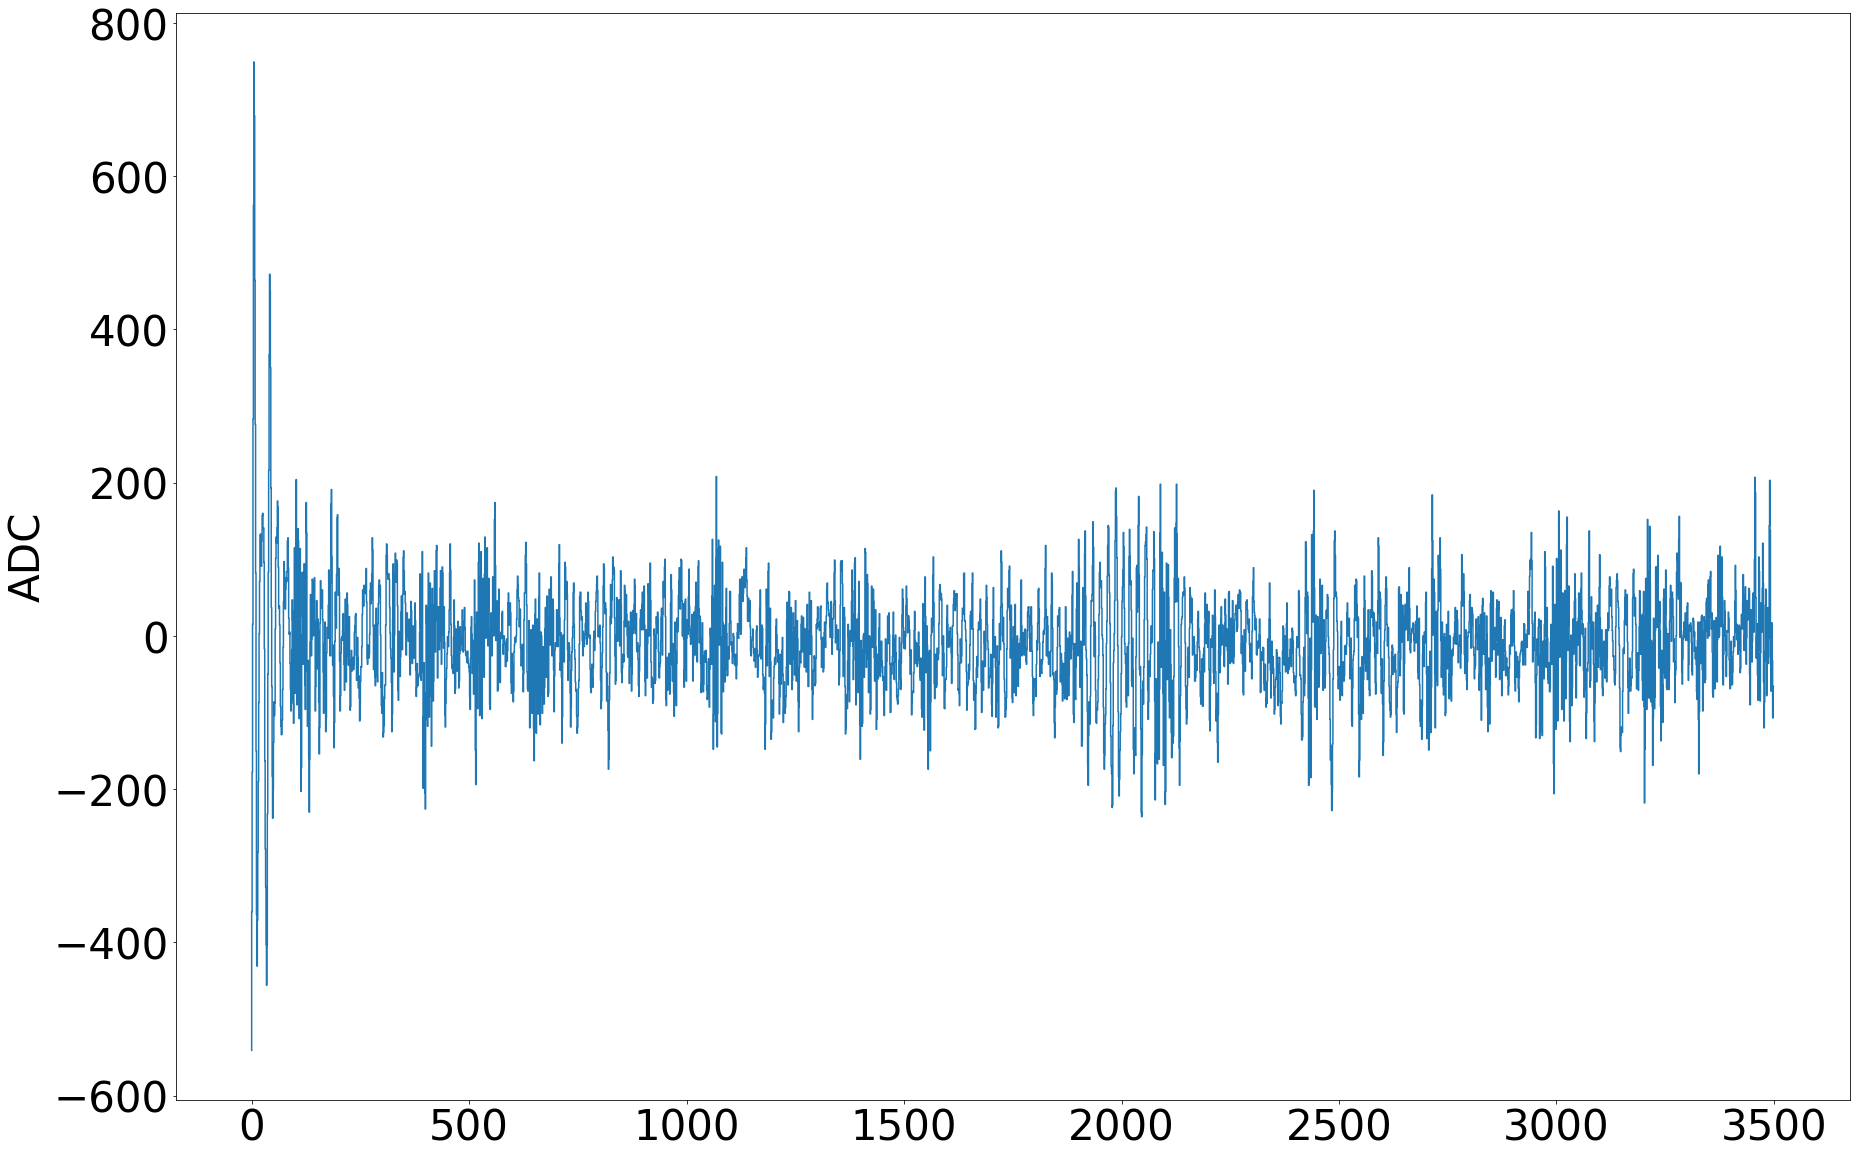

In [7]:
fs=42
count=0                                                               
lst=[]
stamps=[]
t=np.arange(3500)
freq=np.fft.fftfreq(t.shape[-1],d=4E-9)
plt.figure(figsize=(30,20))
for i in range(len(data)):
    tran=np.abs(np.fft.fft(data['wave'][i]))
    mx=np.amax(tran)
    tran/=mx
    if np.any(tran[freq>1.08E8]>0.02) and np.max(data['wave'][i]>500):
        plt.plot(t,data['wave'][i],ls='steps')
        lst.append(i)
        stamps.append(data['timestamp'][i])
        count+=1
plt.tick_params(labelsize=fs)
plt.ylabel('ADC',fontsize=fs)
plt.savefig('remaining_cor_events.png')
plt.show()

In [6]:
print count/float(len(data))

0.0462884553684


63E
64W
64E
65E
65W
75W
There are 6 flagged that have amplitudes larger than 100 ADC
17601


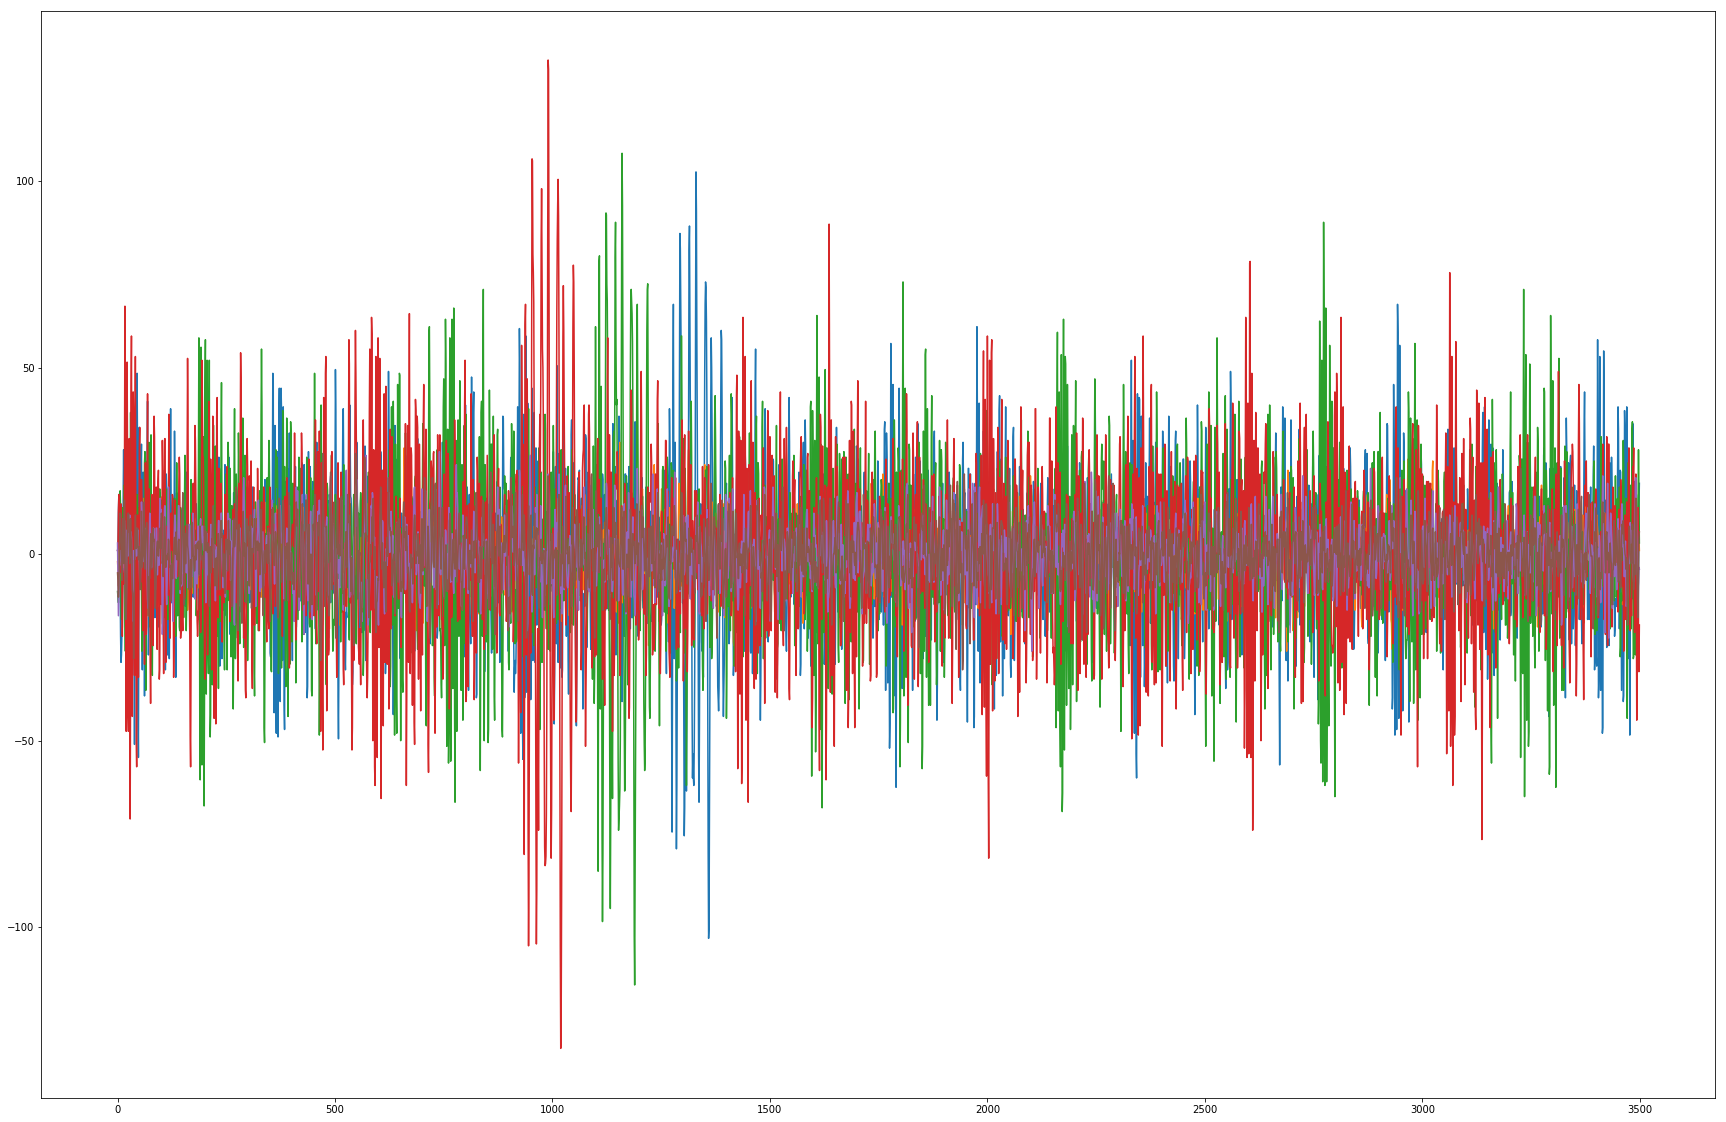

In [7]:
count=0
trp=np.zeros(3500)
wo.trap(arr=trp,fall=1100,rise=400,top=70)
plt.figure(figsize=(30,20))
for i in range(len(lst)):
    if np.max(data['wave'][i])>100 and i <50:
        plt.plot(t,np.gradient(data['wave'][i]))
        count+=1
        print pd.pixel(data['board'][i],data['channel'][i])
    if count >5:
        break
print 'There are '+str(count)+' flagged that have amplitudes larger than 100 ADC'
print len(lst)

In [12]:
cordat=data[lst]
print cordat['wave'][0]

[  7   2   4 ..., -25 -18 -17]
